In [45]:
import shap
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 

#### Load Data from csv file

In [46]:
file = '/Users/kiananasiri/Desktop/Machine Learning/heart_classification.csv'


In [47]:
df = pd.read_csv(file)

In [48]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
df['caa'].value_counts()

caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [50]:
df = df [ (df['caa'] <= 3) ]
df['caa'].value_counts()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
df['restecg'].value_counts()

restecg
1    148
0    146
2      4
Name: count, dtype: int64

### Data Visualization and Analysis

##### Removing nonconsidered data df['caa'] = 4 from data.

In [52]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

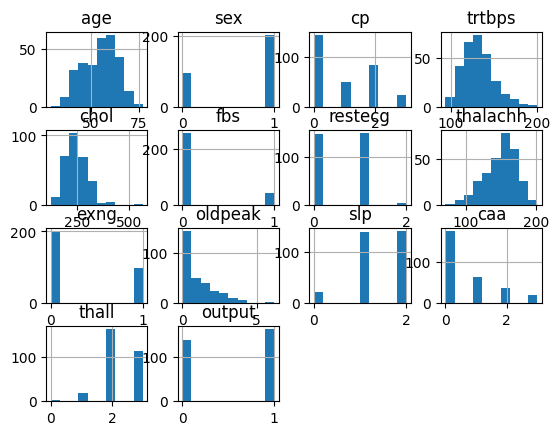

In [53]:
df.hist()

In [54]:
y = df.output
print ( y.value_counts() )
df.columns

output
1    161
0    137
Name: count, dtype: int64


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

array([[<Axes: title={'center': 'age'}>]], dtype=object)

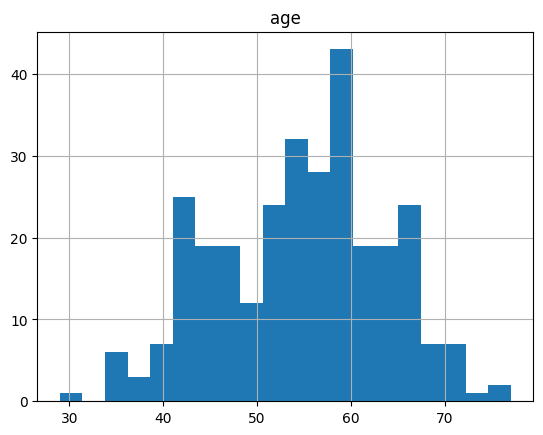

In [55]:
df.hist ( column= 'age' , bins = 20 )

array([[<Axes: title={'center': 'trtbps'}>]], dtype=object)

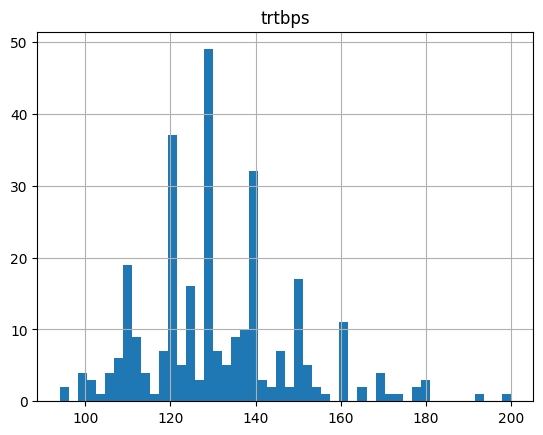

In [56]:
df.hist ( column= 'trtbps' , bins = 50 )

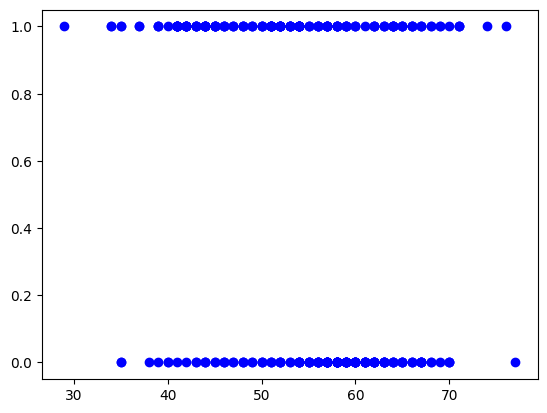

In [57]:
plt.scatter ( df['age'] , df['output' ] , c='b' ) 
plt.show()

### Feature Set

In [58]:
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall' ]
X =   df[ features ]

y =  df['output'] 

#### Normilize Data

In [59]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit(X).transform(X.astype(float))

In [60]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( X , y ,test_size = .1 , random_state=1 )

## Models


### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

model = DecisionTreeClassifier()
model.fit(x_train , y_train)

y_hat = model.predict ( x_test) 

print( accuracy_score ( y_test , yhat ) )


0.8333333333333334


In [62]:
print ( "prediction: " , yhat[:10] )
print ( "y_test : " , np.array( y_test[:10]  )) 

prediction:  [0 0 1 0 0 0 1 1 1 1]
y_test :  [1 0 1 0 0 0 0 1 1 1]


### Confusion Matrix def

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[12  3]
 [ 2 13]]


#### Confusion Matrix for Decision Tree

Confusion matrix, without normalization
[[12  3]
 [ 2 13]]


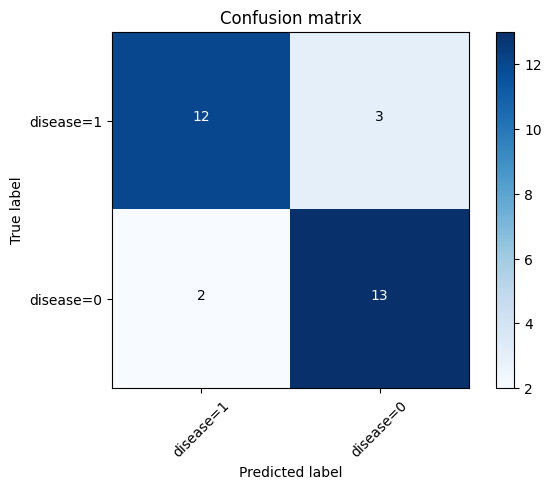

In [65]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['disease=1','disease=0'],normalize= False,  title='Confusion matrix')

### KNN 

In [66]:
from sklearn.neighbors import KNeighborsClassifier 
scores= np.zeros ( 30 )
std_acc = np.zeros ( 30 )

for k in range(5 , 35):
    model = KNeighborsClassifier(n_neighbors= k)
    model.fit( x_train , y_train )
    
    y_hat = model.predict ( x_test )
    scores[k-5] =  accuracy_score( y_test , y_hat ) 
    std_acc[k-5]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

print ( "Test max accuracy score is ", max(scores))

Test max accuracy score is  0.8


##### Plot of the model for different Ks in arnge (5 , 35 )

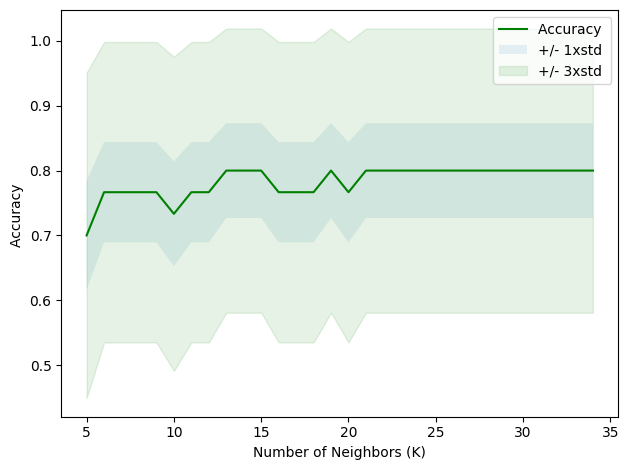

In [67]:
plt.plot(range(5,35),scores,'g')
plt.fill_between(range(5,35),scores - 1 * std_acc, scores + 1 * std_acc, alpha=0.10)
plt.fill_between(range(5,35),scores - 3 * std_acc, scores + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Confusion matrix, without normalization
[[14  1]
 [ 5 10]]


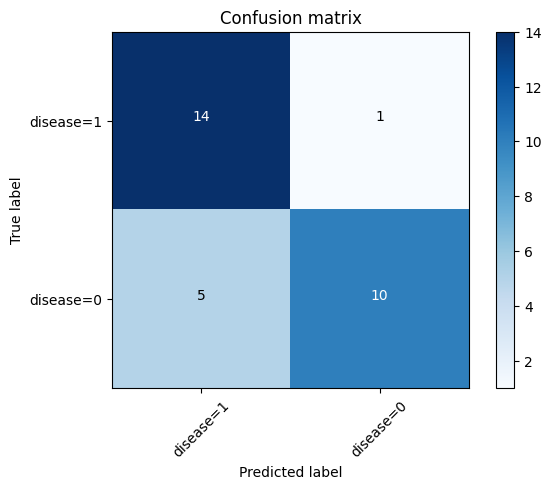

In [83]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['disease=1','disease=0'],normalize= False,  title='Confusion matrix')

In [85]:
print ( classification_report ( y_hat , y_test ))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.93      0.74      0.82        19

    accuracy                           0.80        30
   macro avg       0.80      0.82      0.80        30
weighted avg       0.84      0.80      0.80        30



### Logistic Regression

In [68]:
X = np.asarray ( X ) 
y = np.asarray ( y )

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(C = .1 , solver = 'liblinear' )
model.fit ( x_train , y_train )

LogisticRegression(C=0.1, solver='liblinear')

In [70]:
y_hat = model.predict ( x_test )
print ( y_hat , np.asarray( y_test ) , sep='\n' )

[0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0]
[1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0]


In [71]:
y_hat_prob = model.predict_proba(x_test)
y_hat_prob

array([[0.95, 0.05],
       [0.91, 0.09],
       [0.49, 0.51],
       [0.83, 0.17],
       [0.91, 0.09],
       [0.33, 0.67],
       [0.27, 0.73],
       [0.02, 0.98],
       [0.13, 0.87],
       [0.02, 0.98],
       [0.28, 0.72],
       [0.02, 0.98],
       [0.04, 0.96],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.61, 0.39],
       [0.96, 0.04],
       [0.04, 0.96],
       [0.94, 0.06],
       [0.43, 0.57],
       [0.41, 0.59],
       [0.16, 0.84],
       [0.04, 0.96],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.74, 0.26],
       [0.12, 0.88],
       [0.28, 0.72],
       [0.99, 0.01],
       [0.93, 0.07]])

In [72]:
from sklearn.metrics import jaccard_score 
jaccard_score ( y_test , y_hat , pos_label=0)

0.625

#### Confusion Matrix of Logistic Regression

Confusion matrix, without normalization
[[14  1]
 [ 5 10]]


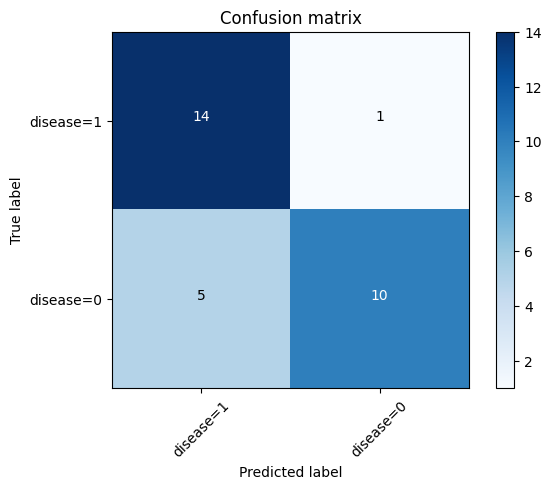

In [74]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['disease=1','disease=0'],normalize= False,  title='Confusion matrix')

#### Evaluation with logloss and classifiaction report 

In [75]:
print (classification_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.74      0.93      0.82        15

    accuracy                           0.80        30
   macro avg       0.82      0.80      0.80        30
weighted avg       0.82      0.80      0.80        30



In [76]:
from sklearn.metrics import log_loss
log_loss(y_test, y_hat_prob)

0.4778071893342756

### RandomForestClassifier and using Shap to select most important features

In [77]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier ()
model.fit(x_train , y_train )

RandomForestClassifier()

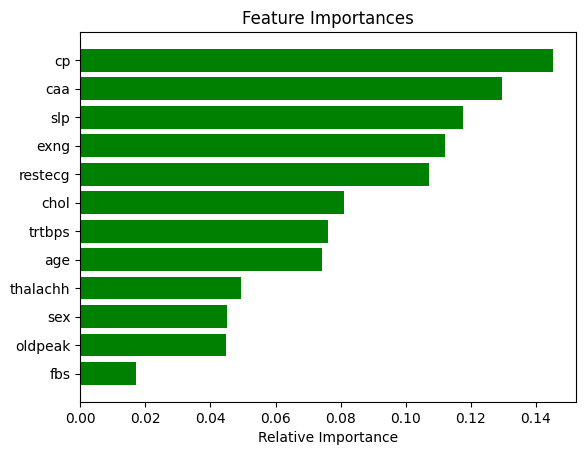

In [78]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

according to this shap plot I removed fbs from features  beacuse it had least effect on predition.

### SVM 

In [79]:
from sklearn import svm
from sklearn.metrics import jaccard_score 
from sklearn.metrics import classification_report

kernels = [ 'rbf' , 'linear' , 'poly', 'sigmoid', 'precomputed' ]

for i in kernels:
    model = svm.SVC(kernel = i ) 
    model.fit( x_train , y_train )
    y_hat = model.predict ( x_test) 
    print ( "when kernel = {} then jaccard score is {} and the classification report is {} ".format( i , jaccard_score(y_hat , y_test) , 
                                                                                          classification_report ( y_hat , y_test)) )

when kernel = rbf then jaccard score is 0.65 and the classification report is               precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.87      0.72      0.79        18

    accuracy                           0.77        30
   macro avg       0.77      0.78      0.76        30
weighted avg       0.79      0.77      0.77        30
 
when kernel = linear then jaccard score is 0.7 and the classification report is               precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.93      0.74      0.82        19

    accuracy                           0.80        30
   macro avg       0.80      0.82      0.80        30
weighted avg       0.84      0.80      0.80        30
 
when kernel = poly then jaccard score is 0.6190476190476191 and the classification report is               precision    recall  f1-score   support

           0       0.60      0.82     

ValueError: Precomputed matrix must be a square matrix. Input is a 268x12 matrix.

so according to reports i choose kernel = 'sigmoid' 

In [80]:
model =  svm.SVC ( kernel = 'sigmoid' ) 
model.fit( x_train , y_train )
y_hat = model.predict ( x_test) 

#### Evaluation of SVM model 

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.93      0.74      0.82        19

    accuracy                           0.80        30
   macro avg       0.80      0.82      0.80        30
weighted avg       0.84      0.80      0.80        30

Confusion matrix, without normalization
[[14  1]
 [ 5 10]]


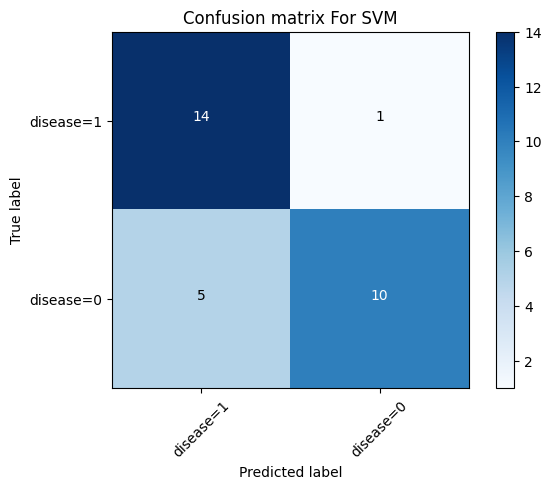

In [81]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

print ( classification_report ( y_hat , y_test) )

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['disease=1','disease=0'],normalize= False,  title='Confusion matrix For SVM')

In [82]:
from sklearn.metrics import jaccard_score 

print ( jaccard_score ( y_hat , y_test ) )

0.7
